#  Introduction to Logistic Regression

**Logistic Regression** is a widely used supervised machine learning algorithm for classification problems. It is designed to model the probability that a given input belongs to a particular class.

Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression** predicts **probabilities** of class membership and maps the output between **0 and 1** using the **sigmoid function**.


## Key Concepts

- **Classification**: Logistic regression is used when the output variable is categorical.
- **Sigmoid Function**: It transforms the linear output into probabilities.
  
### Logistic Regression Formula

The logistic (sigmoid) function is defined as:

\\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\\]

where:

\\[
z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
\\]

- \\( \sigma(z) \\) gives the **probability** that the input belongs to the positive class.
- The output of \\( \sigma(z) \\) always lies between **0 and 1**.


- **Decision Boundary**: Typically, a threshold of 0.5 is used. If the predicted probability is greater than 0.5, the instance is classified as class 1, otherwise as class 0.

## Use Cases

- Email spam detection (spam or not spam)
- Customer churn prediction (churn or not churn)
- Disease diagnosis (positive or negative)
- Multiclass problems using One-vs-Rest or Softmax (multinomial logistic regression)


## Advantages

- Easy to implement and interpret
- Works well for linearly separable data
- Outputs probabilities, which are useful for ranking

## Limitations

- Assumes linear relationship between features and the log-odds of the outcome
- Not ideal for very complex relationships or large datasets without regularization

 


In [20]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# Load data
file_name = "pm25Predict.csv"
df = pd.read_csv(file_name)
df.head()

,Row Labels,dew,humidity,pressure,temperature,wind-speed,pm25Class
0,Perth,8.989796,76.979592,1016.411224,13.841837,3.592857,1
1,Hobart,4.187755,70.275510,1008.664286,10.788776,2.461224,1
2,Huế,23.896907,71.891753,1006.247423,29.427835,1.854639,1
3,Dijon,13.693878,65.448980,1016.397959,20.443878,2.619388,1
4,Reykjavík,7.239796,77.122449,1007.688776,11.168367,3.865306,1


In [26]:
df.shape

(192, 7)

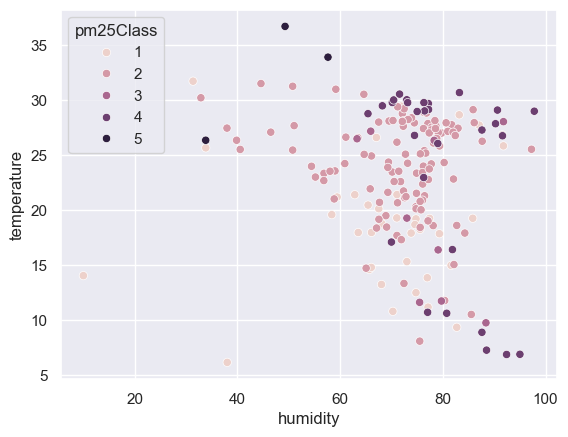

In [19]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="humidity", y="temperature", hue="pm25Class", data=df)

In [35]:
# Extract the columns we'll use for our data

x = df.iloc[:,1:6].values 
y = df.iloc[:,6].values

In [36]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [37]:
# Fit (train) the Logistic Regression classifier
from sklearn.metrics import classification_report
clf = linear_model.LogisticRegression(C=0.001, solver='newton-cg')
fitted_model = clf.fit(X_train, Y_train)
predictions = fitted_model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.53      0.97      0.68        31
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1

    accuracy                           0.52        58
   macro avg       0.11      0.19      0.14        58
weighted avg       0.28      0.52      0.36        58



c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Predict based on dew	humidity	pressure	temperature	wind-speed
dew = 25
humidity = 78
pressure = 1000
temperature = 40
wind_speed = 4

# Get prediction
prediction = clf.predict([(dew, humidity, pressure, temperature, wind_speed)])

if prediction[0]:
  result = "Class 1"
else:
  result = "not the best"


print("City is " + result)

City is Class 1


### Displaying our theta parameter values

![alt text](https://miro.medium.com/max/2220/1*siWAvCzFy2zp81pDNoa4UA.png)

In [11]:
# We have 3 values of theta

# For theta_0:
print( fitted_model.intercept_ )

# For theta_1 and theta_2:
print( fitted_model.coef_ )

[-11.81984747]
[[-0.22252233  0.16452822]]


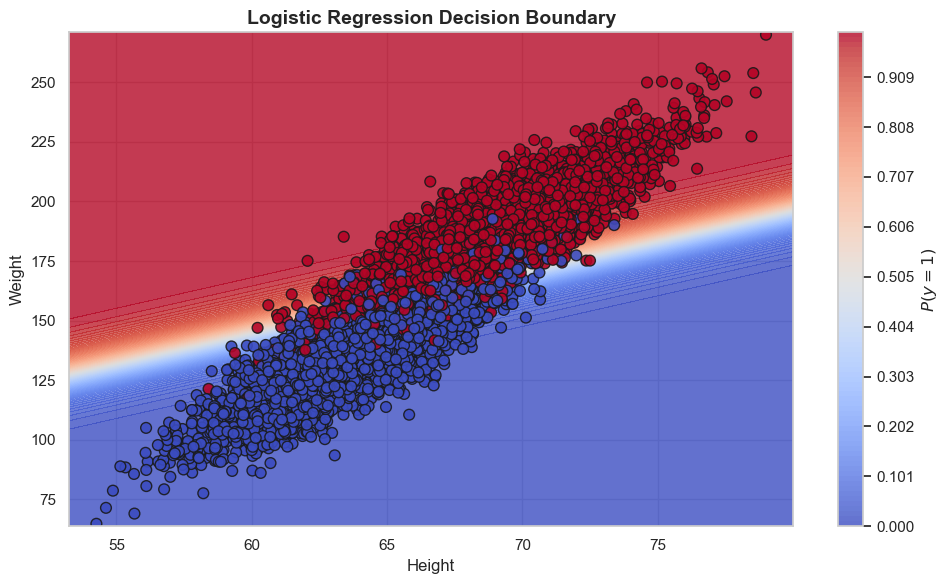

In [12]:
# Prettier Logistic Regression Decision Boundary Plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Assuming x, y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, Y_train)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Improved Visualization
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(xx, yy, probs, levels=np.linspace(0, 1, 100), cmap="coolwarm", alpha=0.8)

cbar = fig.colorbar(contour, ax=ax)
cbar.set_label(r"$P(y = 1)$", fontsize=12)

scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="coolwarm", s=60,
                     edgecolor="k", linewidth=1, alpha=0.9)

ax.set_title("Logistic Regression Decision Boundary", fontsize=14, weight='bold')
ax.set_xlabel("Height", fontsize=12)
ax.set_ylabel("Weight", fontsize=12)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect("auto")

plt.tight_layout()
plt.show()


# Logistic Regression: Solvers & Regularization Strength (C)

##  Solvers in Logistic Regression

Each solver is an optimization algorithm used to find the best-fitting model parameters.

| Solver       | Description                                                                 | Supports L1? | Supports L2? | Best Use Case                                           |
|--------------|------------------------------------------------------------------------------|--------------|--------------|----------------------------------------------------------|
| **liblinear**| Coordinate descent; good for small datasets                                  |  Yes         | Yes        | Binary classification or small datasets (one-vs-rest)   |
| **sag**      | Stochastic Average Gradient; efficient for large datasets                    | No           | Yes        | Large datasets with many features                       |
| **saga**     | Extension of SAG; supports L1 and L2, works well with sparse data            | Yes          | Yes        | Large-scale and sparse data scenarios                   |
| **lbfgs**    | Quasi-Newton method; good for medium datasets, supports multinomial loss     | No           | Yes        | Default for many problems                               |
| **newton-cg**| Newton’s method with conjugate gradient; supports multinomial loss           | No           | Yes        | Multiclass problems using the 'multinomial' option      |

---

##  C Parameter (Inverse of Regularization Strength)

**C controls the trade-off between model complexity and generalization.**

| C Value | Regularization Strength | Notes                                                  |
|--------:|--------------------------|--------------------------------------------------------|
| **0.01** | Very strong             | High penalty, simpler model                            |
| **0.1**  | Strong                  | Helps reduce overfitting                               |
| **1**    | Baseline (default)      | Balanced regularization                                |
| **10**   | Weak                    | Allows more complexity                                 |
| **100**  | Very weak               | May lead to overfitting, especially on noisy data      |

---

## Summary Tips

- Use **liblinear** for small/binary classification problems.
- Use **saga** or **sag** for large-scale or sparse datasets.
- Use **lower C** (e.g., 0.01) to avoid overfitting.
- Use **higher C** (e.g., 10 or 100) when underfitting is an issue.
- Combine **GridSearchCV** with solvers and C values to tune the best model.


In [14]:
solvers = ['liblinear', 'sag', 'saga', 'lbfgs', 'newton-cg']
c_values = [0.01, 0.1, 1, 10, 100]

for solver in solvers:
    for c in c_values:
        try:
            model = LogisticRegression(solver=solver, C=c, max_iter=1000)
            model.fit(X_train, Y_train)
            score = model.score(X_test, y_test)
            print(f"Solver: {solver}, C: {c}, Accuracy: {score:.4f}")
        except Exception as e:
            print(f"Solver: {solver}, C: {c}, Error: {e}")


Solver: liblinear, C: 0.01, Error: name 'y_test' is not defined
Solver: liblinear, C: 0.1, Error: name 'y_test' is not defined
Solver: liblinear, C: 1, Error: name 'y_test' is not defined
Solver: liblinear, C: 10, Error: name 'y_test' is not defined
Solver: liblinear, C: 100, Error: name 'y_test' is not defined
Solver: sag, C: 0.01, Error: name 'y_test' is not defined
Solver: sag, C: 0.1, Error: name 'y_test' is not defined
Solver: sag, C: 1, Error: name 'y_test' is not defined
Solver: sag, C: 10, Error: name 'y_test' is not defined
Solver: sag, C: 100, Error: name 'y_test' is not defined
Solver: saga, C: 0.01, Error: name 'y_test' is not defined
Solver: saga, C: 0.1, Error: name 'y_test' is not defined
Solver: saga, C: 1, Error: name 'y_test' is not defined
Solver: saga, C: 10, Error: name 'y_test' is not defined
Solver: saga, C: 100, Error: name 'y_test' is not defined
Solver: lbfgs, C: 0.01, Error: name 'y_test' is not defined
Solver: lbfgs, C: 0.1, Error: name 'y_test' is not defin


## Multiclass Logistic Regression

For problems with **more than two classes**, logistic regression can be extended using:

### 1. One-vs-Rest (OvR)
- Fits one binary classifier per class.
- Each classifier predicts whether a sample belongs to its class vs. all other classes.
- Default in `sklearn` when `multi_class='ovr'`.

### 2. Multinomial Logistic Regression
- Directly models the probability distribution across multiple classes using **softmax function**.
- Often more accurate for truly multiclass problems.
- Use `multi_class='multinomial'` with solvers like `lbfgs`, `newton-cg`, `sag`, or `saga`.

**Softmax Function**:
The probability that input **x** belongs to class **j** is given by the **softmax** function:

\\[
P(y = j \mid \mathbf{x}) = \frac{e^{z_j}}{\sum_k e^{z_k}}
\\]

Where:

- \\( z_j \\) is the score (logit) for class **j**
- The denominator is the sum of exponentiated logits over all classes \\( k \\)
- This ensures that all class probabilities are positive and sum to 1

The softmax function generalizes the logistic function for multiclass classification problems.



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load a sample multiclass dataset (e.g., Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try multiple solvers for multiclass
solvers = ['newton-cg', 'saga', 'lbfgs']
for solver in solvers:
    print(f"\n=== Solver: {solver} ===")
    #model = LogisticRegression(solver=solver, max_iter=1000)
    model = LogisticRegression(solver=solver, max_iter=2000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))



=== Solver: newton-cg ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Solver: saga ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Solver: lbfgs ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
   